In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.examples.tutorials.mnist import input_data

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as: tensorflow_datasets.load('mnist')
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/_DataSet.py from tensorflow/models.


# 查看数据

In [3]:
type(mnist)

tensorflow.examples.tutorials.mnist.input_data._Datasets

In [4]:
type(mnist.train.images)

numpy.ndarray

In [5]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [6]:
mnist.train.images.shape

(55000, 784)

In [7]:
mnist.train.images[2].shape

(784,)

In [8]:
sample_image = mnist.train.images[2].reshape(28, 28)

In [9]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


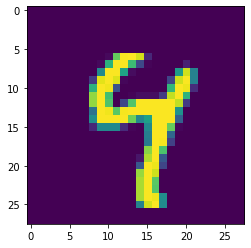

In [10]:
plt.imshow(sample_image)

# 设定网络参数

In [11]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [12]:
n_hidden_1 = 256
n_hidden_2 = 256
n_input = 784
n_classes = 10
n_samples = mnist.train.num_examples
print(n_samples)

55000


# 定义Placeholder(占位符)

In [13]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

# 建构多层神经网络

In [14]:
def multilayer_perceptron(x, weights, biases):
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# 设定权重与偏倚

In [15]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [16]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# 建立模型

In [17]:
pred = multilayer_perceptron(x, weights, biases)

# 设定代价函数

In [18]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



# 初始化所有变量

In [19]:
init = tf.global_variables_initializer()

# 训练模型

## 取得一批数据

* * * * * * * * * * * * * * * * * * * * 
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
* * * * * * * * * * * * * * * * * * * * 


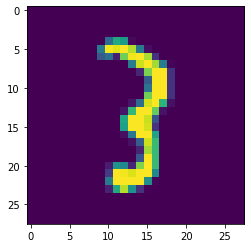

In [20]:
Xsamp, ysamp = mnist.train.next_batch(1)
plt.imshow(Xsamp.reshape(28, 28))

print('* ' * 20)
print(ysamp)
print('* ' * 20)

# 执行会话

In [25]:
# Start the session
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

for epoch in range(training_epochs):
    # Initial the cost = 0.0
    avg_cost = 0.0
    
    total_batch = int(n_samples/batch_size)
    
    for i in range(total_batch):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})
        
        # Compute average loss
        avg_cost += c / total_batch
        
    print('Epoch: {} cost = {}'.format(epoch+1, avg_cost))
    
print('Training Completed in {} Epochs'.format(training_epochs))

/opt/anaconda3/lib/python3.7/site-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


NameError: name 'result' is not defined

# 评估模型

In [22]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
correct_predictions[0]

<tf.Tensor 'strided_slice:0' shape=() dtype=bool>

### 将boolean 类型的值转换为浮点型

In [23]:
correct_predictions = tf.cast(correct_predictions, 'float')
correct_predictions[0]

<tf.Tensor 'strided_slice_1:0' shape=() dtype=float32>

In [24]:
accuracy = tf.reduce_mean(correct_predictions)
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [25]:
mnist.test.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [26]:
mnist.test.images.shape

(10000, 784)

In [27]:
print('Accuracy: ', accuracy.eval({x:mnist.test.images, y:mnist.test.labels}))

Accuracy:  0.9092
